# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is dedicated to analyzing a dataset and building predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

The deliverables are: the brief one-page summary of this project for external stakeholders and the complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In the deliverables, the model evaluation (and interpretation if applicable) and select data visualizations, ethical considerations, and the resources I used to troubleshoot and find answers or solutions are included.


# **PACE stages**


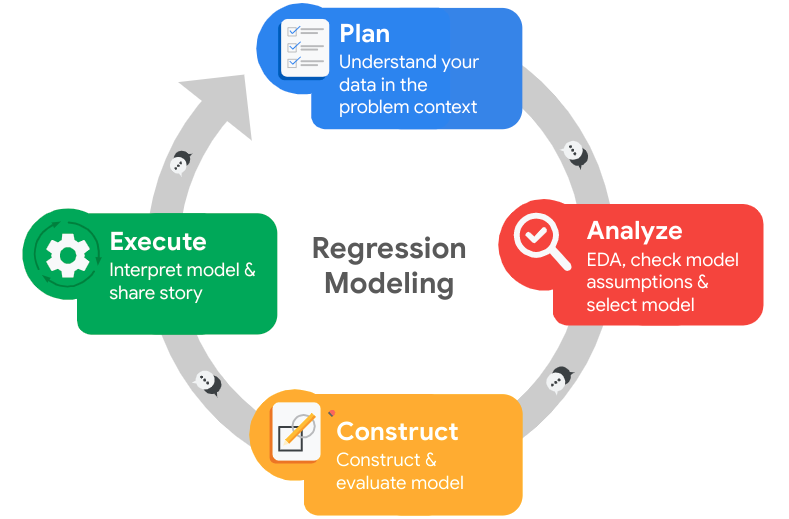

## **Pace: Plan**

The problem context is reviewed below:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. The main question is: what’s likely to make the employee leave the company?

My goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

This dataset contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Questions to reflect on.

- Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Salifort Motors HR department
2. I am trying to explore the underlying factors that contribute to employee churn and give action-oriented insights
3. The dataset is organized along several categorical and numeric variables that might contribute to the dependent variable at the boolean column `left`.
4. [DZone](https://dzone.com) and [365DataScience](https://365datascience.com) were the starting point of refreshing my knowledge.
5. Yes, checking the data source for representation characteristics and adjusting for class imbalance if needed.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# Operational packages
import pandas as pd
import numpy as np

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# To display all the columns in datasets
pd.set_option('display.max_columns', None)

# Data modelling packages
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics, data splitting, model evaluation and visualizations
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle 

### Load dataset

`Pandas` is used to read a dataset called **`HR_Salifort.csv`.**

In [2]:
# Load dataset into a dataframe
# Open the file in read mode ('r')

df0 = pd.read_csv(r"C:\Users\lenovo\Downloads\HR_Salifort.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- The first look at the variables
- Data cleaning



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, renaming columns is needed. The snake case convention needs to be met, along with the correction of typos and shortening column names as practical.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {
    "average_montly_hours":"average_monthly_hours",
    "time_spend_company":"tenure",
    "Work_accident" : "work_accident",
    "Department":"department"
})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isnull().sum(axis=0)


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

No missing values found.

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

20% of the data has duplicates

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


The observations are very unlikely to be legitimate. In other case Bayesian theorem could be used to analyze the likelihood,
but this situation requires dropping duplicated columns.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

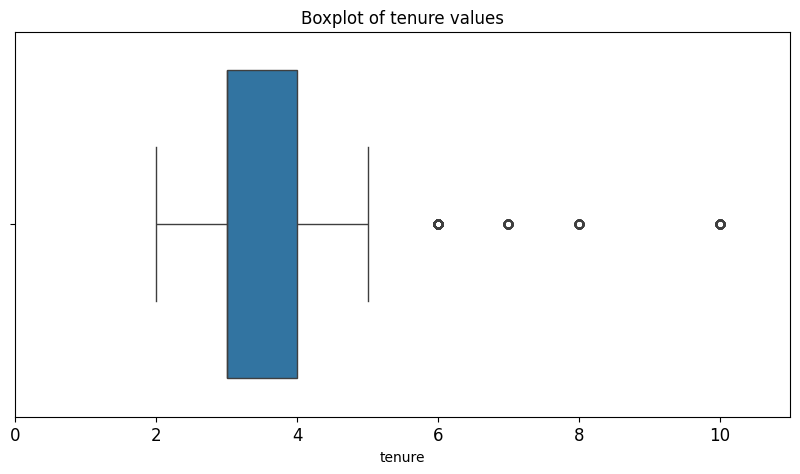

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(10,5))
plt.title('Boxplot of tenure values', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, df1['tenure'].max()+1)
sns.boxplot(x=df1['tenure'], width=0.8)
plt.show()



In [12]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

print("Number of outlier observations: ", len(outliers))



Lower limit: 1.5
Upper limit: 5.5
Number of outlier observations:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The last evaluation value tends to be higher than the satisfaction level at a first glance.
2. The tenure data has many outliers, indicating some employees who worked for more than 5.5 years, and the minimum is 2 years.
3. Renamed columns for consistens styling and fixing typos, cleaned data from duplicated values.
4. EDA ensures that the data is correctly understood and quality-checked and we can proceed with feature selection, also it is 
    the starting point for model selection.
5. [Pandas](https://pandas.pydata.org/docs/index.html), [Numpy](https://numpy.org/doc/), [Matplotlib](https://numpy.org/doc/), [Seaborn](https://seaborn.pydata.org/index.html), [Scikit-learn](https://scikit-learn.org/stable/index.html) documentation websites and Python's [pickle](https://docs.python.org/3/library/pickle.html) object serialization documentation.
   Also, the [Machine Learning Mastery](https://machinelearningmastery.com) is a great reference site for model selection and comparison.
7. Yes, for instance, whether or not keeping duplicated values will be appropriate and whether there are indications of bias in data.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
stayed_v_left = df1['left'].value_counts()
print(stayed_v_left)

# Get percentages of people who left vs. stayed
df1['left'].value_counts(normalize=True)

left
0    10000
1     1991
Name: count, dtype: int64


left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Creating a boxplot of average monthly hours and number of projects can give an idea of how loaded were those who stayed and left (what can be included in the hue).
Next, the histogram is created by choosing the discrete variable of number of projects with distribution, divided by the 'left' column

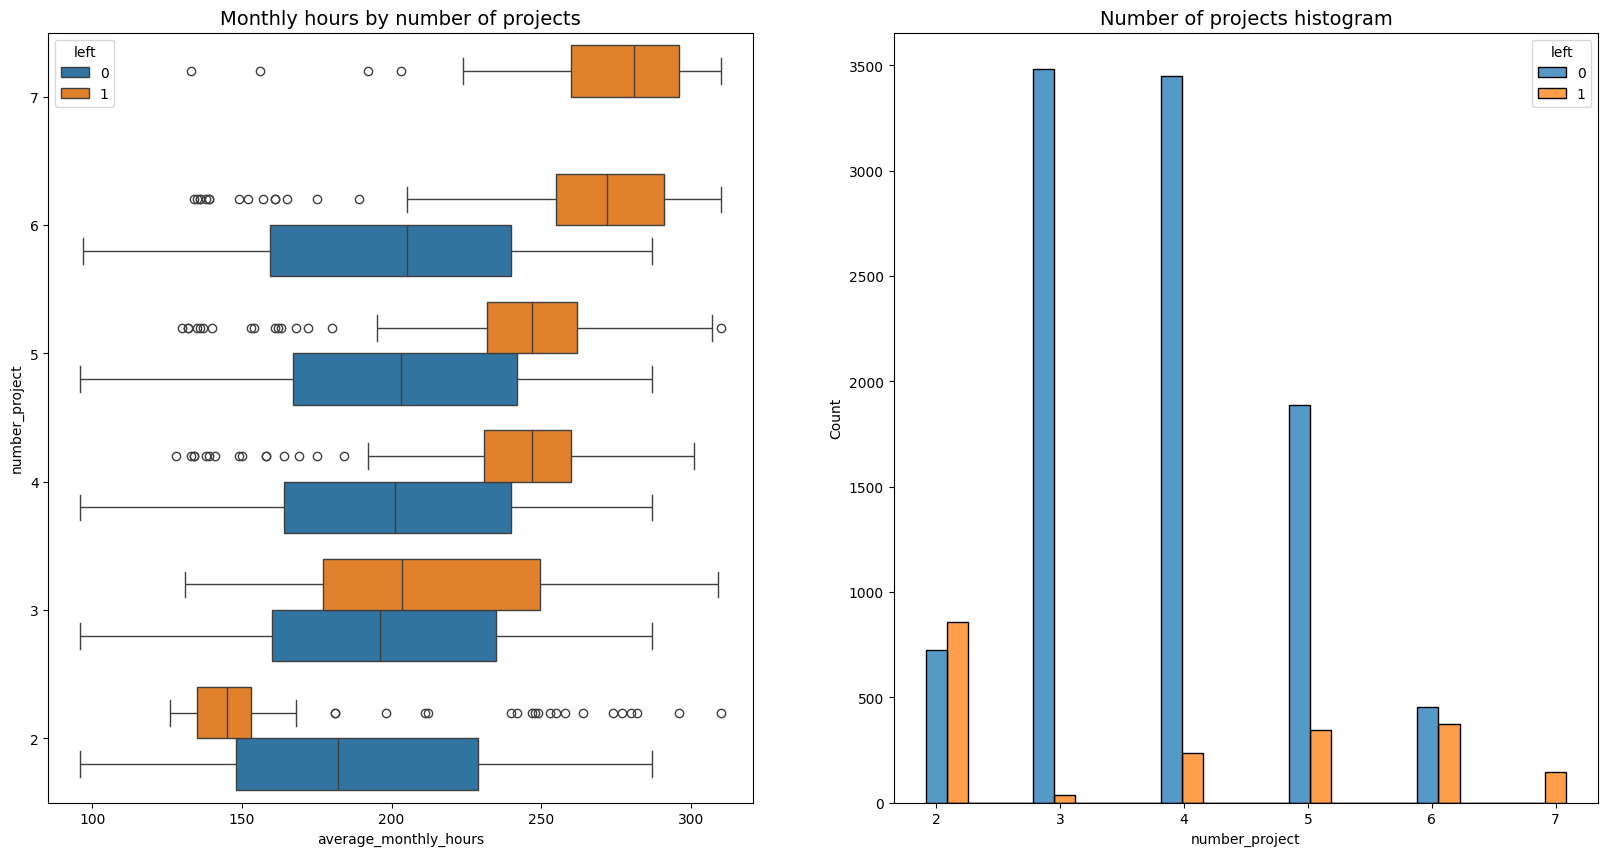

In [15]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (20,10))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, 
#comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()


1. The boxplot displays significantly higher median ofaverage monthly hours for those who left for number of projects at 3 or more.
Further, all those assigned 7 projects left the company* and had the highest median of average monthly hours;

On the other hand, those who were assigned 2 projects and left the company had lower median of average monthly hours,
although numerous outliers are seen for this subgroup at average monthly hours above 230.

2. The histogram shows the distribution of those who stayed and left by the number of projects. The highest count of left
employees is at 2 project assignments and the lowest, both numerically and proportionally, is at 3 projects assignments.

* Below is the confirmation of this.

In [16]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

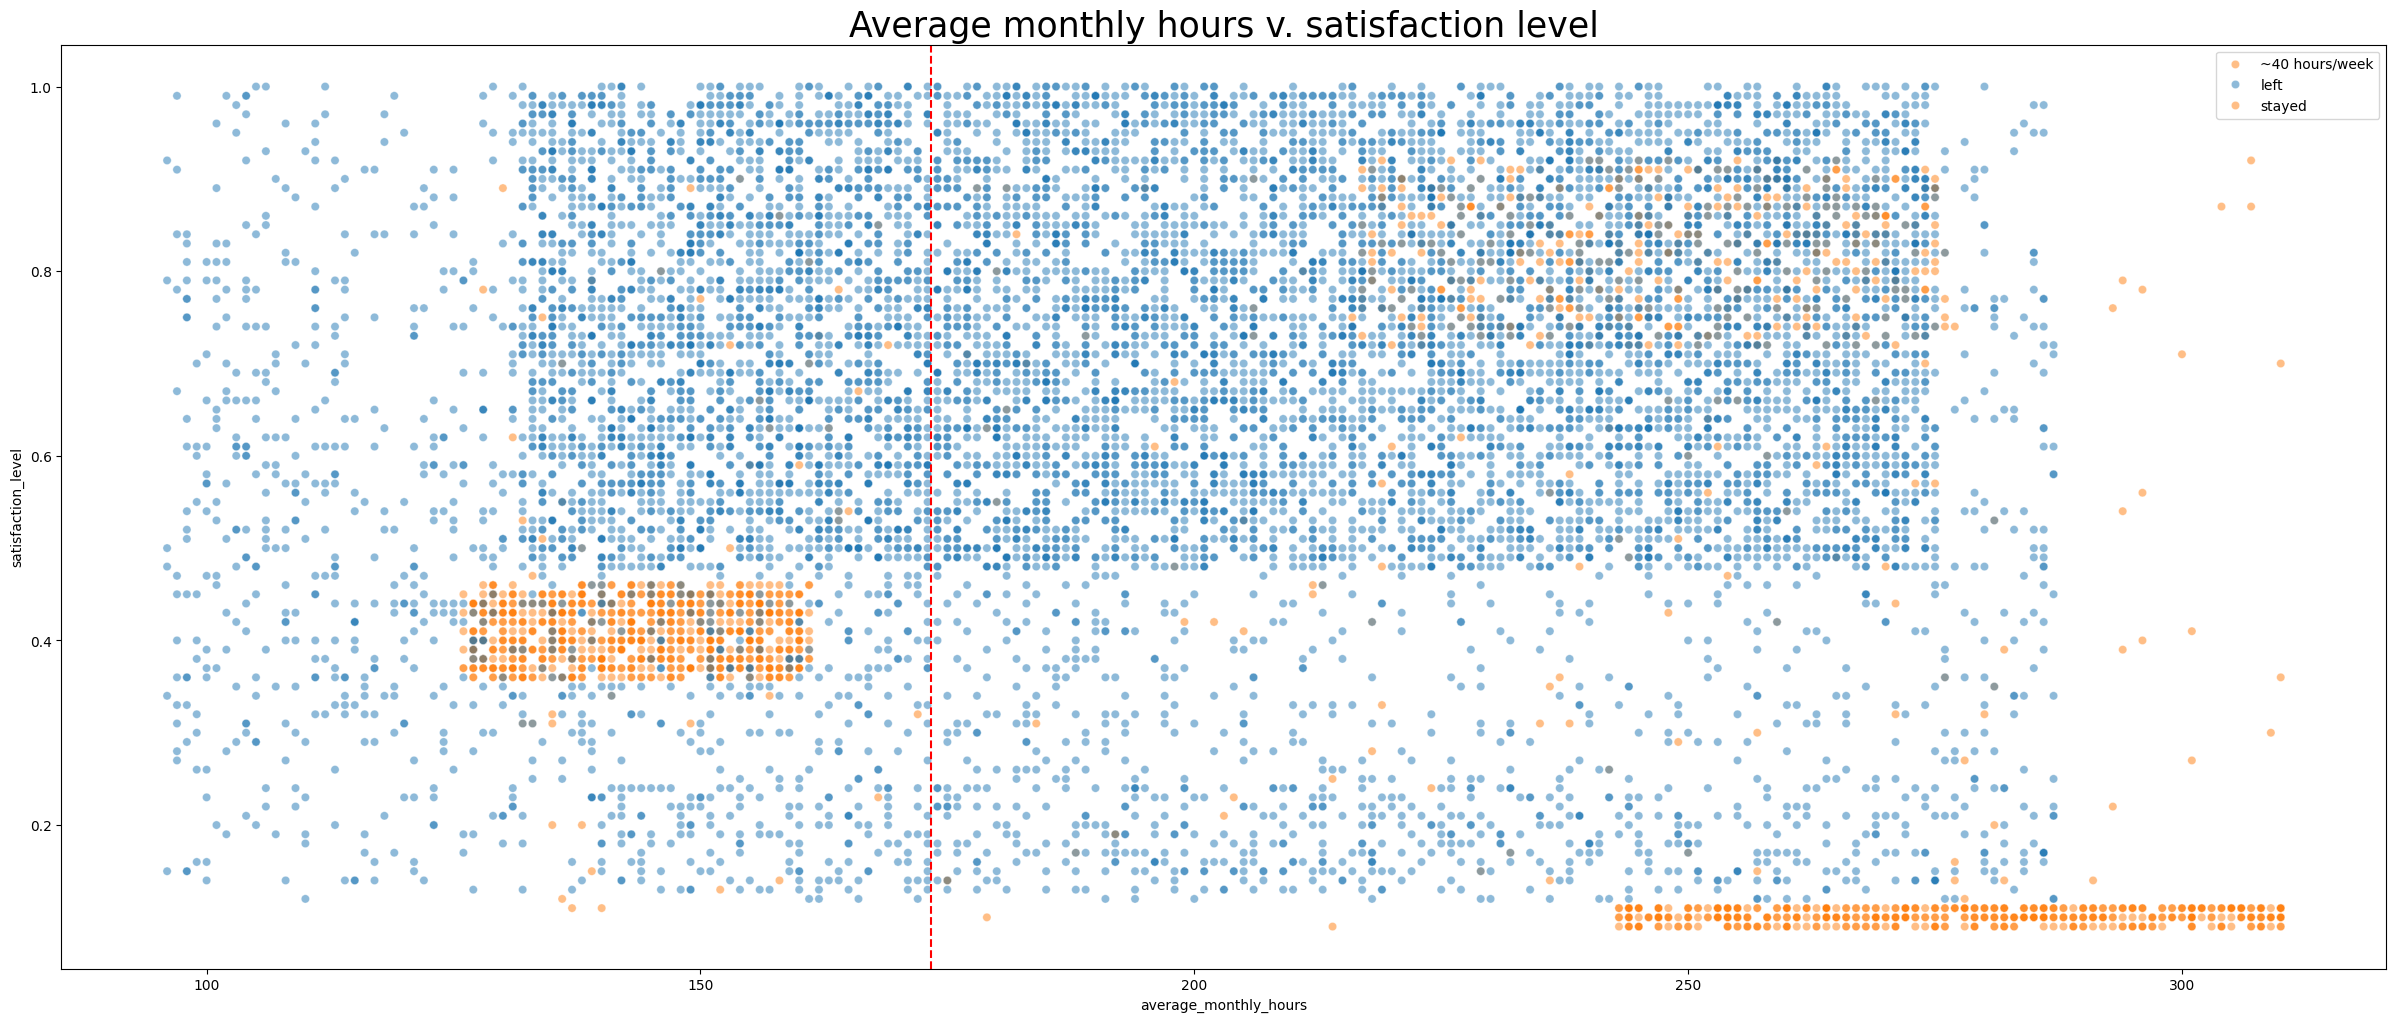

In [17]:
plt.figure(figsize=(30, 12))
plt.title("Average monthly hours v. satisfaction level", fontsize=25)
sns.scatterplot(data=df1, x=df1['average_monthly_hours'], y=df1['satisfaction_level'], hue='left', alpha=0.5)
sns.color_palette()
plt.axvline(x=173.33, color='r', label='~40 hours/week', ls = '--') 
plt.legend(labels=['~40 hours/week', 'left', 'stayed'])


The two dense clusters of for left employees are seen at lowest satisfaction level and monthly average hours above 240 and at satisfaction levels of about 0.4 and less than 40 hours per week workload. Another cluster is at monthly hour range of 220-275
and satisfaction levels ranging between 0.7 and 0.9, overlapping with the observations for those who stayed.

Further, we examine the patterns seen between satisfaction level and tenure, and the count of churned employees by tenure against of those who stayed.

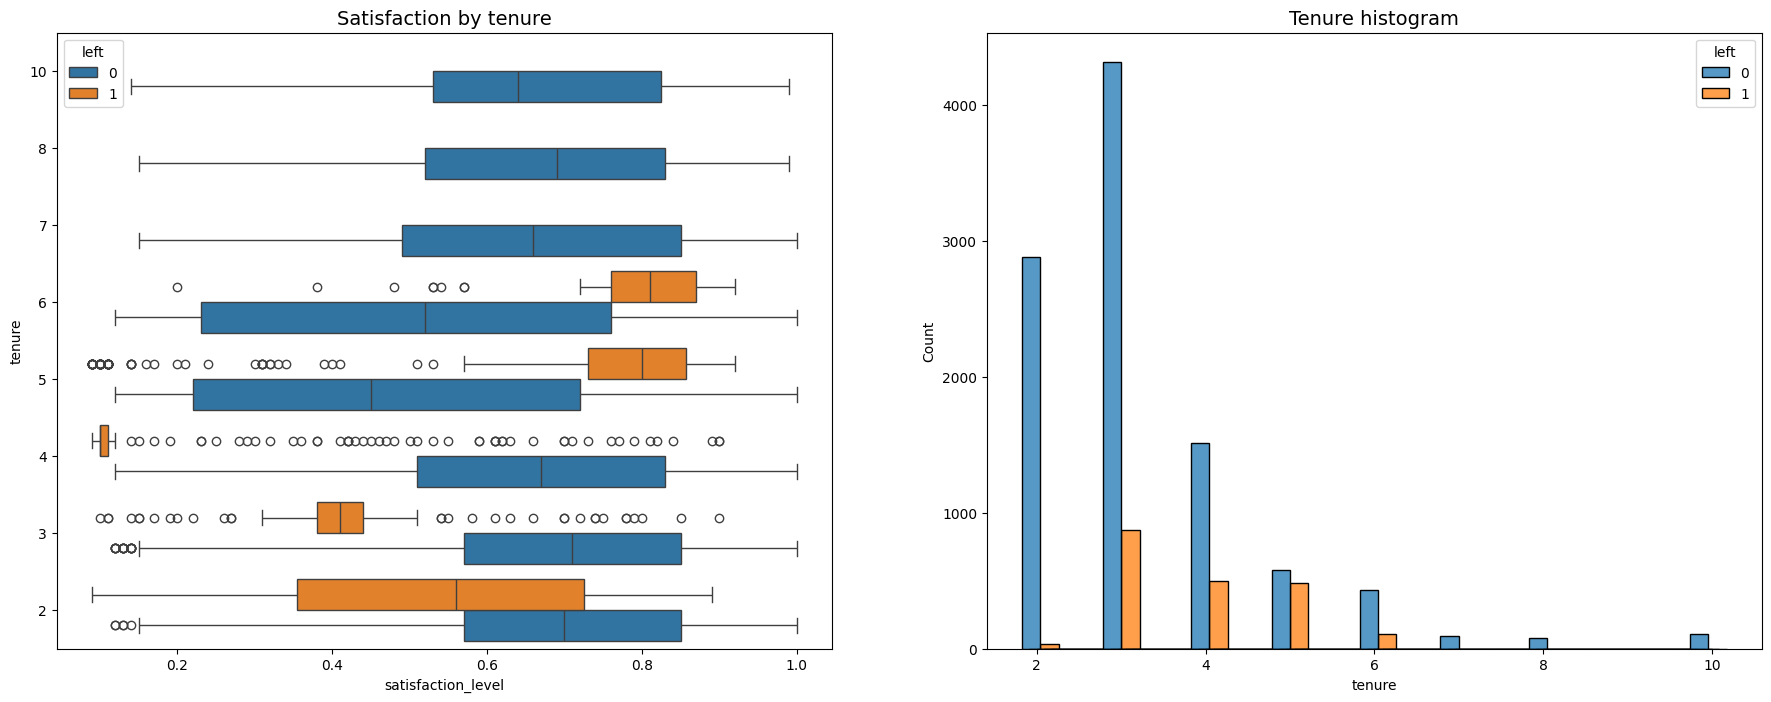

In [18]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();


At tenure length of 2 years, the variablity of satisfaction level among those who left was the highest, and the count of this group lowest, rendering it more important to look at the data of those who left with 3 or 4 years of tenure and constitute a larger amount of churned employees. Interestingly, the variance of satisfaction levels diminish at 3 and 4 years of tenure for those who left, and the median satisfaction level falls to 0.4 at 3 years of tenure for leaving employees, and the minimum of even less than 0.1 at 4 years of tenure. These stage might represent highly dissatisfied employees' churn.

 The median satisfaction level was lower for those who stayed at the company at tenure years 5 and 6, the proportion of left employees being highest for 5 year tenure.This probably indicates the risk group for the company, as the count of these employees is much higher compared to those with more tenure - there are no left employees observations at tenure years 7-10, meaning no people left at this stage of tenure so far. Moreover, those who left at 5 or 6 years of tenure reported higher satisfaction level and might have been attracted by other companies' offers - a good target group for higher rate of promotions.



In [20]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg(["mean", "median"])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The expected trend is seen for satisfaction level central tendency measures by churn category: higher values for those who stayed.

 The next target variables are tenure and salary

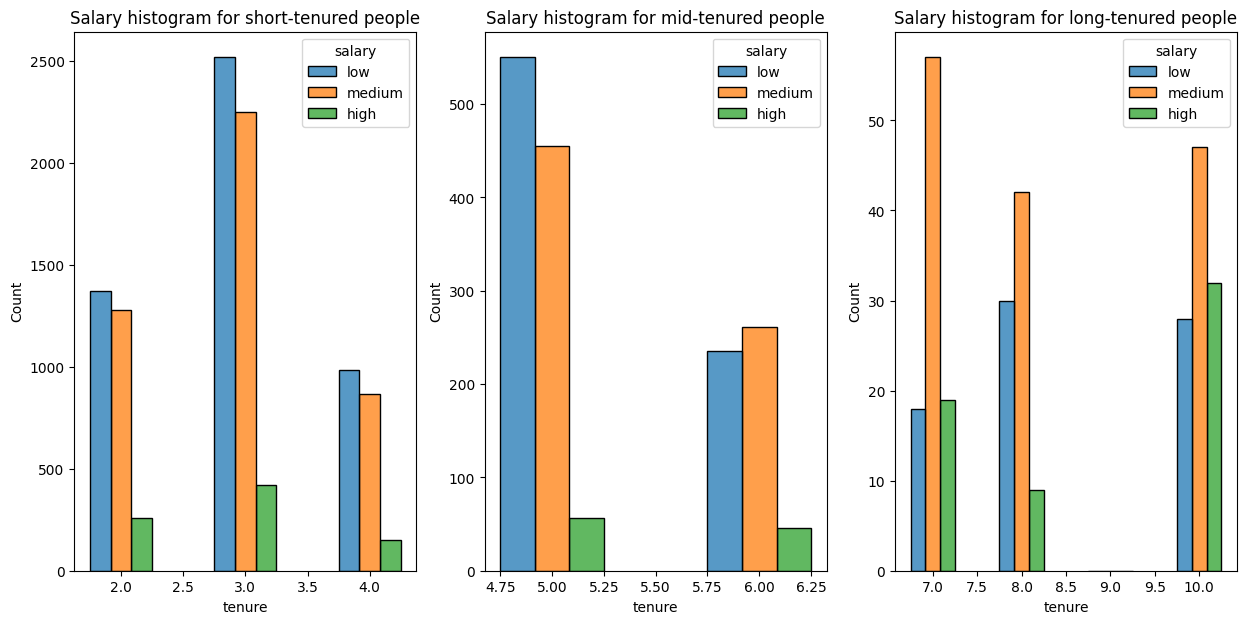

In [21]:
# Set figure and axes
fig, ax = plt.subplots(1, 3, figsize = (15,7))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 5]

# Define mid-tenured employees
tenure_mid = df1[(df1['tenure'] < 7) & (df1['tenure'] > 4)]

# Define long-tenured employees
tenure_long = tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=True, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram for short-tenured people', fontsize='12')

# Plot mid-tenured histogram
sns.histplot(data=tenure_mid, x='tenure', hue='salary', discrete=True, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[1])
ax[1].set_title('Salary histogram for mid-tenured people', fontsize='12');

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=True, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[2])
ax[2].set_title('Salary histogram for long-tenured people', fontsize='12');

All the tenure categories had various levels of salary, with the majority category being low for tenures of 5 year and less, and
medium for higher values.

We can next look at the interaction of work accident and satisfaction level, and whether the satisfaction level is significantly lower for those who experienced work accidents, subdivided by churn status.

Text(0.5, 1.0, 'Work accident and satsifaction levels for staying and leaving employees')

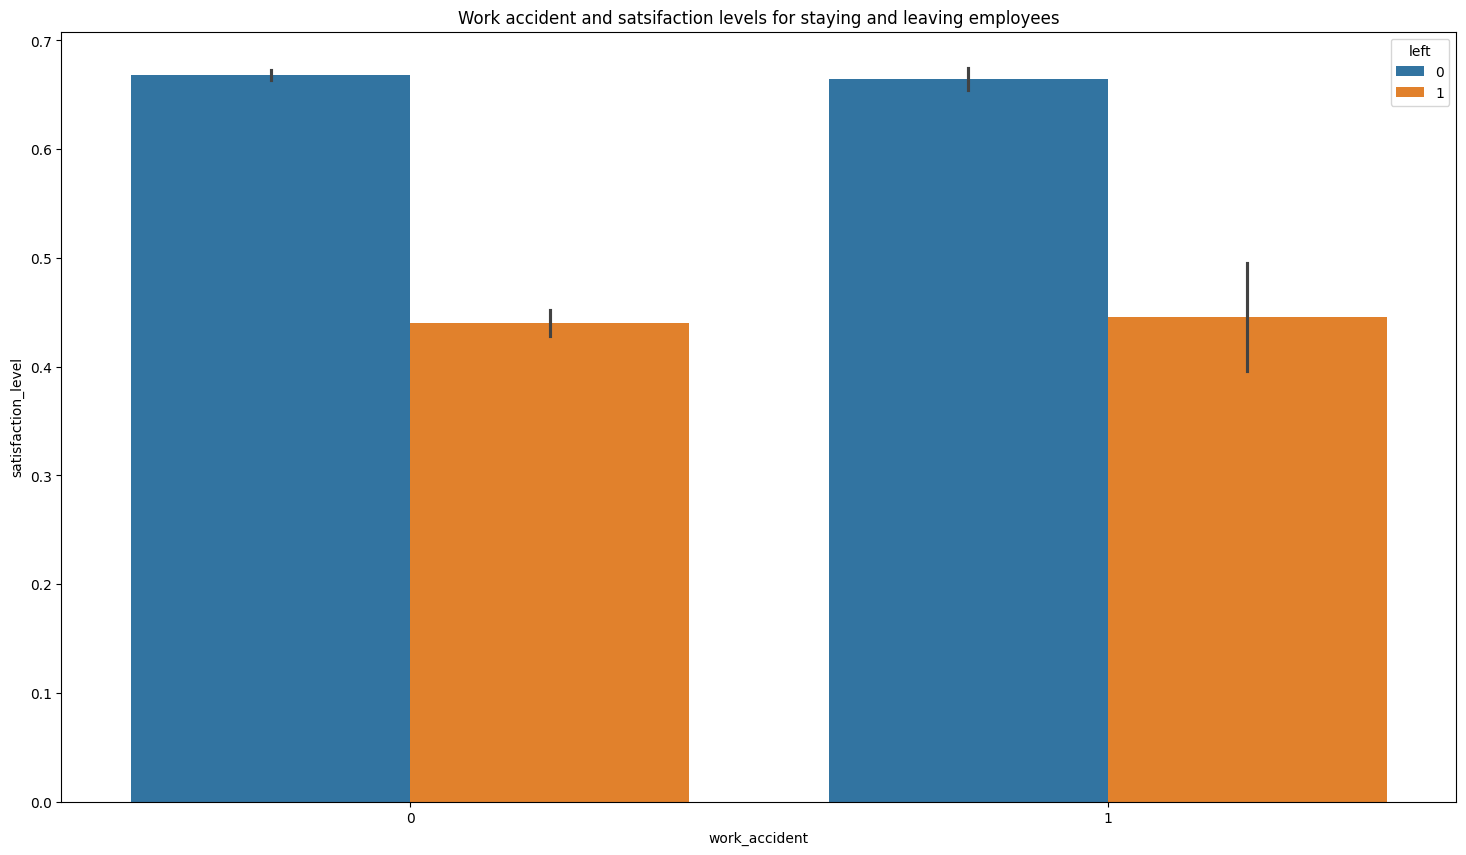

In [51]:
# Create a cat
plt.figure(figsize=(18, 10))
sns.barplot(data=df1, x='work_accident', y='satisfaction_level', hue='left')
plt.title("Work accident and satsifaction levels for staying and leaving employees")

From the bar plot above we can see that satisfaction level was very similar among those who had and did not have an accident at work.

The work's evaluation patterns can be plotted next and the exploration of working hours and last evaluation level is helpful.

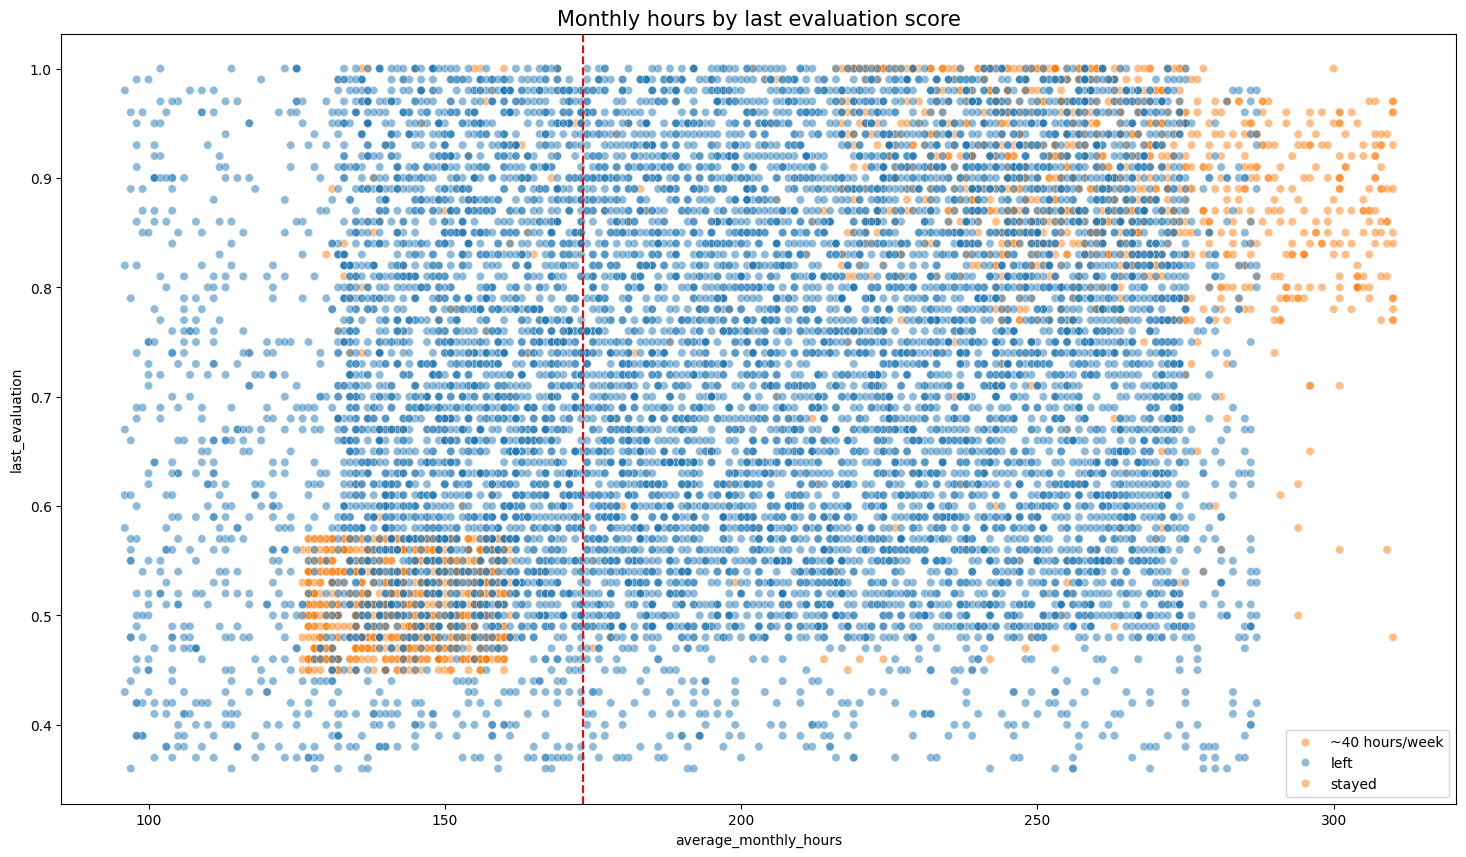

In [22]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(18, 10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5)
plt.axvline(x=173.33, color='r', label='~40 hours/week', ls='--')
plt.legend(labels=['~40 hours/week', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='15');


- The scatterplot shows two groups of employees who left: employees working over 220 hours (recall the satisfaction level groups indicative threshold) who performed very well and employees who worked a little less than 40 hours weekly with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work over 40 hours per week.

Next, you could examine how do employees grouped by working hour bins and promotion event compare in satisfaction levels.

Text(0.5, 1.0, 'Satisfaction by churn: high work hours')

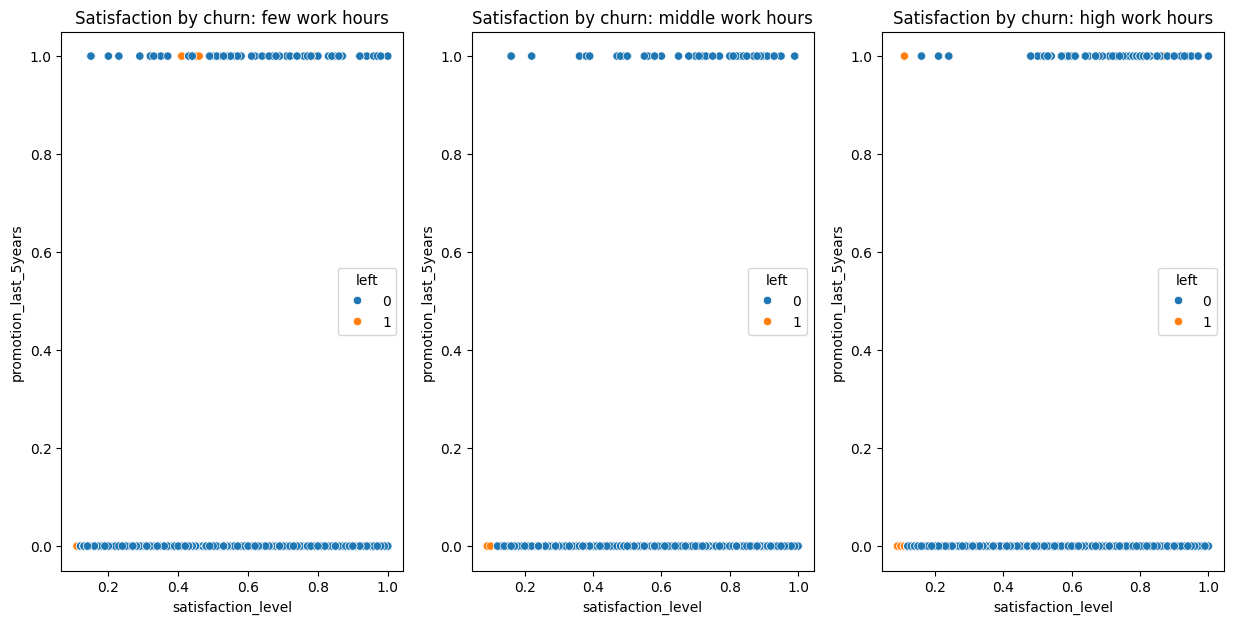

In [23]:
# Defining subsets based on working hour bins: <40h per week, 40h-55h per week, and >55h per week
weekly_under_40h = df1[df1['average_monthly_hours'] < 173.33]
weekly_40h_to_220h_monthly = df1[(df1['average_monthly_hours'] >= 173.33) & (df1['average_monthly_hours'] < 220)]
monthly_over_55h = df1[df1['average_monthly_hours'] > 220]

# Setting and creating a plot
fig, ax = plt.subplots(1,3, figsize = (15,7))

# Plotting histograms for each work week length category
sns.scatterplot(data=weekly_under_40h, x='satisfaction_level', y='promotion_last_5years', hue='left',
             ax=ax[0])
ax[0].set_title("Satisfaction by churn: few work hours", fontsize=12)

sns.scatterplot(data=weekly_40h_to_220h_monthly, x='satisfaction_level', y='promotion_last_5years', hue='left',
              ax=ax[1])
ax[1].set_title("Satisfaction by churn: middle work hours", fontsize=12)

sns.scatterplot(data=monthly_over_55h, x='satisfaction_level', y='promotion_last_5years', hue='left',
              ax=ax[2])
ax[2].set_title("Satisfaction by churn: high work hours", fontsize=12)


Promotions are more often seen among those who stayed in the company (the lower horizontal line), but no similar trend can be seen for satisfaction level by working hour category, except for those who work the most.
 Of those promoted, very few left the company, and those few mostly had low satisfaction. Low satisfaction observation is true 
 for those not promoted as well.

 We can inspect department-wise churn next.

In [24]:
# Display counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

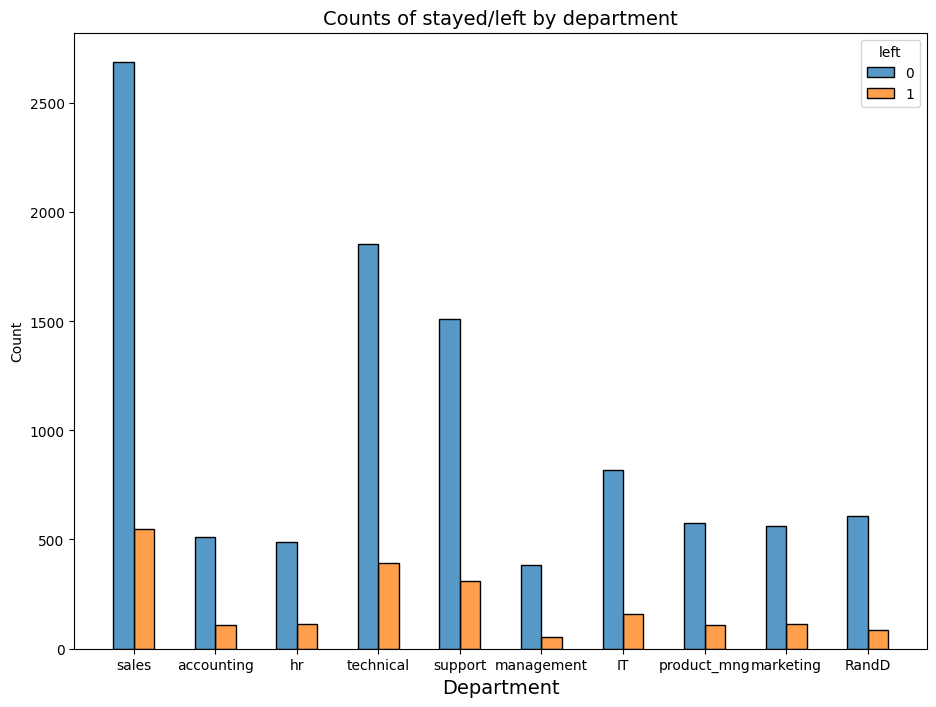

In [29]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xlabel("Department", fontsize=14)
plt.xticks(rotation='horizontal')
plt.title('Counts of stayed/left by department', fontsize=14);

Slightly higher proportion of churn in technical and support departments, and slightly lower in management and sales.

 Further, a heatmap is great to view correlations between all the variables.

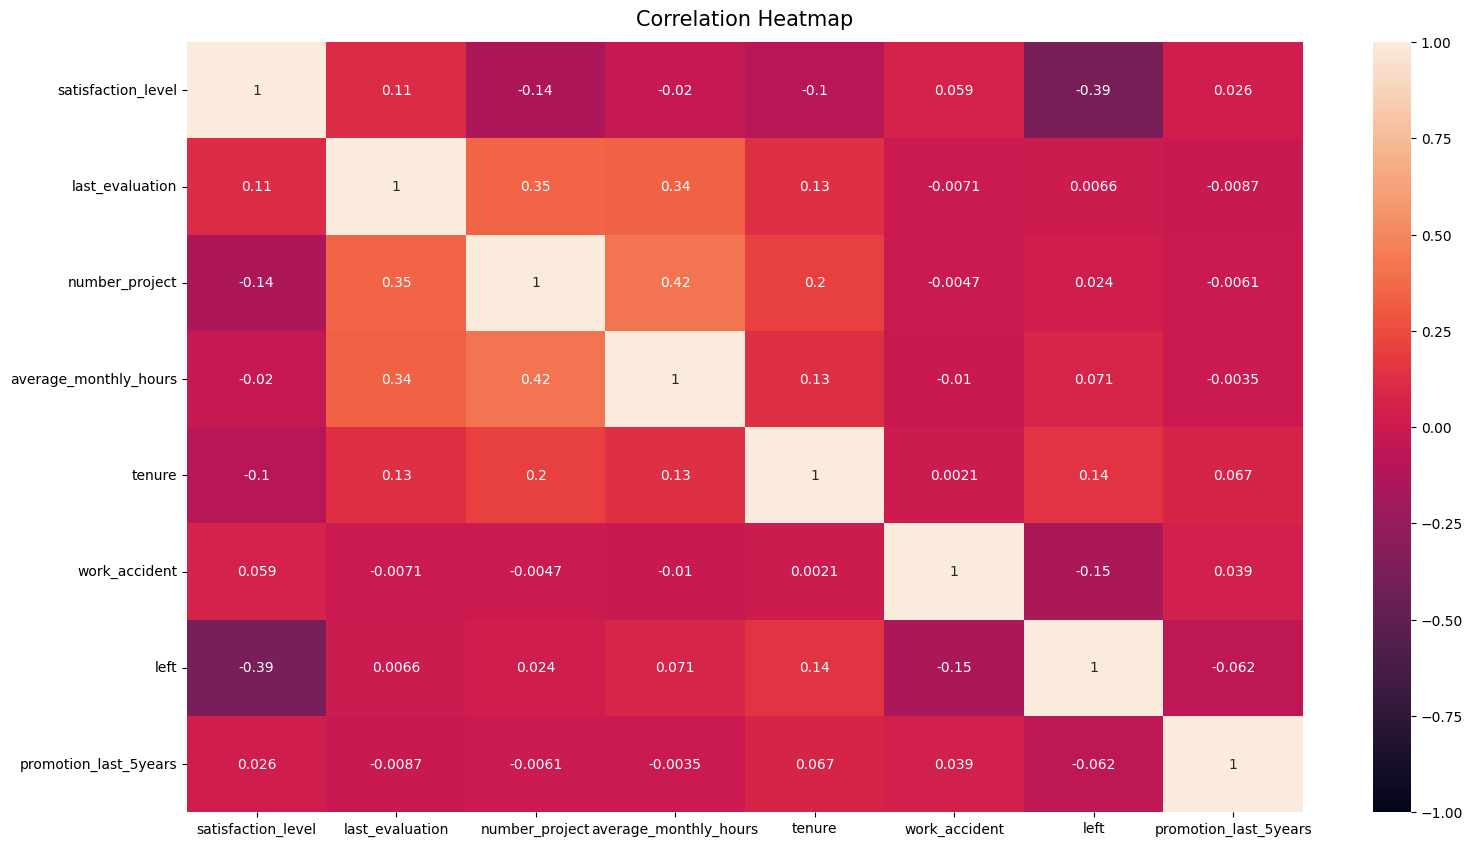

In [32]:
# Setting up a numeric dataframe subset for heatmap plotting
numeric_df = df0.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("rocket", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);


Modest negative correlation of satisfaction_level and left; little negative correlation between work-accident, number_project and left are seen.
Highest positive correlation values are between higher working hours, project quantities, and last_evaluation, pairwise, although the values are between
0.34 and 0.42.

### Insights

 Longer working hours, many projects, and lower satisfaction levels; among shorter tenure workers, lower evaluation scores are some markers of employee leaving. Also, some employees leaving at 5-6 years of tenure might just be exiting because of no promotions. This entails no apparent churning at tenure of 7 years or more.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Questions to reflect on during the construction stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. The only oddity is the lower evaluation being seen mostly in low work weeks, which might make tweaking these variables (making the `last_evaluation` scale in relation to working hours of an observation) increase the model performance.
2. Key chosen variables: average_monthly_hours, number_projects, satisfaction_level, last_evaluation, tenure, and salary. Salary was added to the initial pool to account for its effect and not overlook a complex way it might relate to churn, if any is present. However, other variables were also left to ensure no complex relation is not  overlooked.
3. The assumptions are met except for the suspected multicollinearity between `last_evaluation` and `average_monthly_hours`, which is not critical for the model of Random Forest Classifier.
4. It fits the model well.
5. Yes, the computing efficiency can be improved by tuning hyperparameters and feature engineering.
6. [Pandas](https://pandas.pydata.org/docs/index.html), [Numpy](https://numpy.org/doc/), [Matplotlib](https://numpy.org/doc/), [Seaborn](https://seaborn.pydata.org/index.html), [Scikit-learn](https://scikit-learn.org/stable/index.html) documentation websites and Python's [pickle](https://docs.python.org/3/library/pickle.html) object serialization documentation.
8. Yes, I need to exlpicitly state the implications of using the black forest model, as its results are less easy to interpret and its consequent deployment interpretation needs to be done with caution and preferably comparison with other models.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The task is binary classification on the two outcome possibilities, staying or leaving of employees.

### Identify the types of models most appropriate for this task.

Logistic regression and tree-based models are appropriate model for this task: the categorical dependent variable fits it well.

### Selection
However, the random forest modelling is less susceptible to outliers (as in the tenure column), less prone to overfitting (there are 5 main features identified, along with others to be included), and more reliable in feature scoring, which is essential for the project purpose.

### Modeling a Random Forest Classifier

#### Data preprocessing: encoding non-numeric variables.

The `department` column can be directly used to create dummies, whereas the salary column can be transformed into a scale 

In [35]:
# Copy the dataframe
df_prep = df1.copy()

#Encode the `salary` column into an ordinal numeric category
df_prep['salary'] = (
    df_prep['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encoding the `department` column using pandas.get_dummies
df_prep = pd.get_dummies(df_prep, drop_first=False)

# Checking the dataframe
df_prep.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


Next, we can review the correlation coefficients between the predictor variables of interest in a heatmap

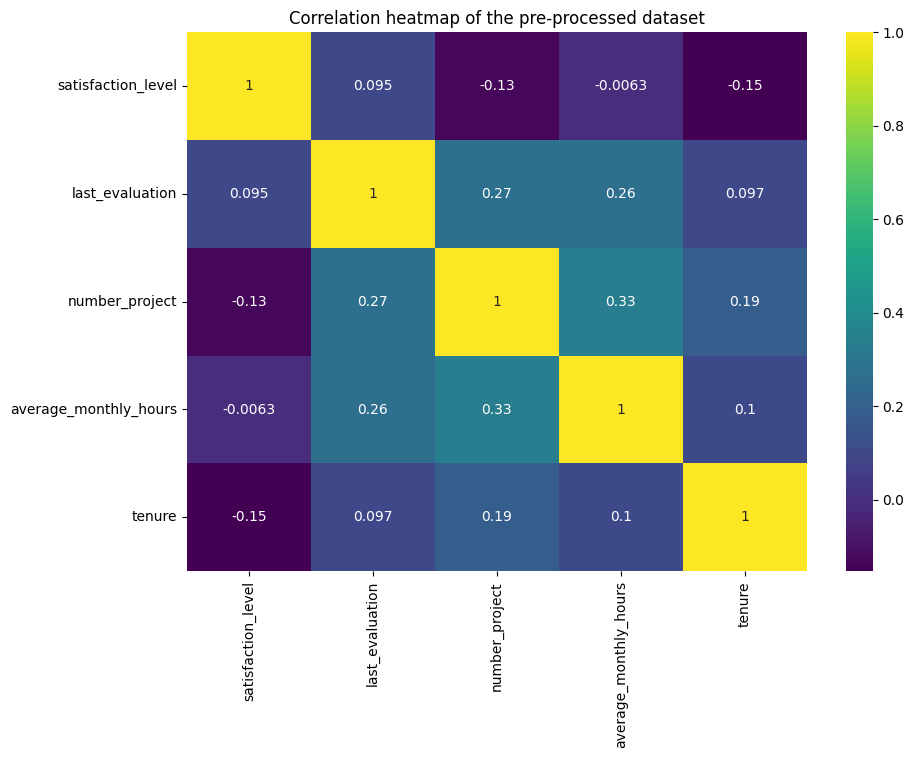

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(df_prep[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(),
           annot=True, cmap="viridis")
plt.title("Correlation heatmap of the pre-processed dataset")
plt.show()

It would also be interesting to see how the data points cluster in regards to satisfaction_level and last_evaluation by churn status.

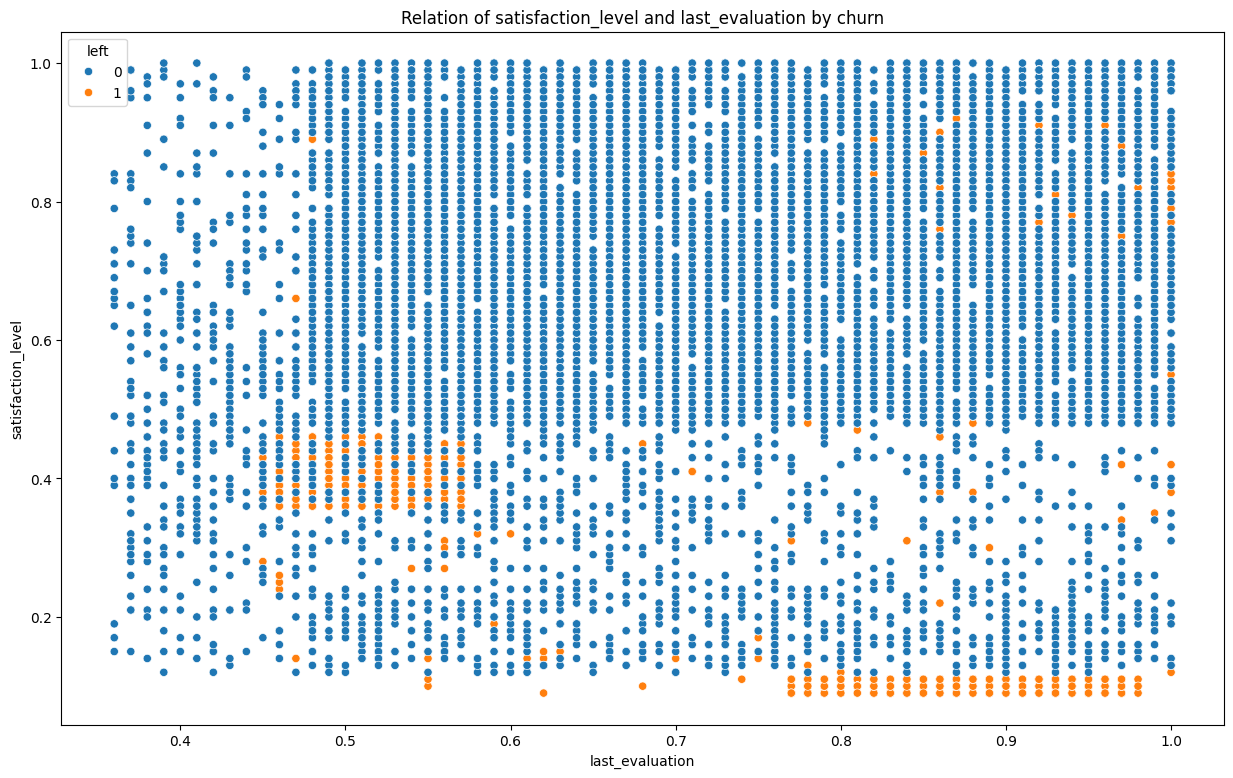

In [37]:
plt.figure(figsize=(15,9))
sns.scatterplot(data=df_prep, x='last_evaluation', y='satisfaction_level', hue='left')
plt.title("Relation of satisfaction_level and last_evaluation by churn")
plt.show()

Again, satisfaction levels are almost always lower than 0.5, whereas the two last_evaluation clusters at around 0.5 (what is low in the dataset) and between roughly 0.78 and 0.98 show the churned employee data points.

### Creating a model

In [57]:
# Isolate the outcome variable
y = df_prep['left']

# Display the last few rows of `y`
y.tail()

11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, dtype: int64

Choose features for the model

In [114]:
# Drop the outcome variable
X = df_prep.drop('left', axis=1)

# First few rows of X displayed
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


Split the data into train and test sets using `train_test_split`

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

Construct a random forest classifier model with a cross-validated grid-search to find the best model parameters

In [62]:
# Set up model instance
rfc = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {
    'max_depth':[4, 5, 6, None],
    'max_features':[1.0],
    'max_samples':[0.7, 1.0],
    'min_samples_leaf':[1,2],
    'min_samples_split':[2,3,4],
    'n_estimators':[400, 500, 600],
}

# Assign a scoring metrics list
scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rfc_cv = GridSearchCV(rfc, cv_params, scoring = scores, cv=5, refit='roc_auc')

Fit the random forest model into the training data

In [63]:
%%time
rfc_cv.fit(X_train, y_train) # Wall time at 48 minutes 2 seconds, that is a long!

CPU times: total: 47min 56s
Wall time: 48min 2s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 5, 6, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [400, 500, 600]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

Specify path for pickle dumping and loading

In [72]:
pickle_path = r'C:/Users/lenovo/Desktop/Digital/ML_models/'

Create functions for writing and reading the model using pickle

In [73]:
def pickle_write(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [77]:
def pickle_read(path, model_filename:str):
    '''
    Input arguments:
        path:           path of the folder to read from
        model_filename: the filename of the model to be read
    Out:
        model:          the pickle-read model
    '''

    with open(path + model_filename + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

Use the functions defined above to save the model in a pickle file and then read it in.

In [75]:
# Write pickle
pickle_write(pickle_path, rfc_cv, 'hr_rf1')

In [78]:
# Read pickle
rf1 = pickle_read(pickle_path, 'hr_rf1')

Find out the best auc score and the optimal parameters of the model

In [80]:
# Best AUC score
print(rf1.best_score_, '\n')

# Best set of params
print(rf1.best_params_)

0.98014235579302 

{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


Next, make a way to save model results by setting up a function to extract scores from the grid search.

In [81]:
def get_model_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Input arguments: 
        model_name:           How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Make a function to save the scores in a DataFrame.

In [82]:
def make_grid_results(model_name:str, model_object, metric:str):
    '''
    Input arguments:
        model_name:   how the name should be named in the output table
        model_object: a GridSearchCV object fit into the training/validation set
        metric:       precision, recall, f1, accuracy, or auc
    Output:
        A pandas DataFrame with the F1, recall, precision, accuracy, and auc scores
        for the model with the best mean 'metric' score across all validation folds
    '''

    # Create a dictionary that maps table metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    
    # Get the results from the GridSearchCV and put them in a DataFrame:
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row with the best chosen metric score in the DataFrame:
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :] # .iloc the maximum value for the metric across all the rows

    # Extract auc, accuracy, precision, recall, and f1 score of the best estimator
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create the table to return
    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'F1': [f1],
        'accuracy': [accuracy],
        'auc': [auc]
    } )

    return table

Next we can put `rfc_cv1` model scores into the table

In [83]:
# Put the CV scores in the table
rf1_results = make_grid_results('random forest cv', rf1, 'auc')
rf1_results


,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.950684,0.917137,0.933557,0.978315,0.980142


Use `get_model_scores` function on the best estimator

In [85]:
rf1_scores = get_model_scores("Random Forest Classifier test 1", rf1, X_test, y_test)
rf1_scores

,model,precision,recall,f1,accuracy,AUC
0,Random Forest Classifier test 1,0.958005,0.917085,0.937099,0.979575,0.954545


 Consistent high scores, at the sacrifice of the speed of the model. Only the AUC score showed a sensible decline of 2.5% from the best estimator's train to its test scores. Still, AUC, accuracy, and precision scores of over 95% are high. F1-score was at 93.7%.

 An interesting characteristic of the model is that its recall is somewhat lower than other scores, indicating a higher proportion of false negatives. Let us view this in a confusion matrix.

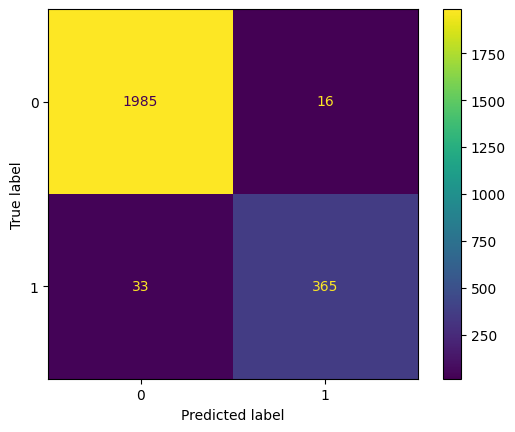

In [117]:
# Generate array of values for confusion matrix
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf1.classes_)
disp.plot(values_format='');

 The confusion matrix shows that there are twice as many false negative predictions as false positives: 33 versus 16.

### Feature engineering

There might be some data that might be spoiled by some factors like the non-coverage of employees for satisfaction levels. 
 Also, the salary might be a column that can be pruned given the rise in its values throughout the tenure, and likely no predictive force.
 The work accident column also looks like a variable that has low predictive power.
 
 We can proceed with dropping the `satisfaction_level`, `salary`, and `work_accident` columns from the dataset.

In [86]:
# Drop the columns `satisfaction_level`, `salary`, `work_accident`
df_prep2 = df_prep.drop(columns=['satisfaction_level', 'salary', 'work_accident'])

#Display the first few rows
df_prep2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,1,0,False,False,False,False,False,False,False,True,False,False
1,0.86,5,262,6,1,0,False,False,False,False,False,False,False,True,False,False
2,0.88,7,272,4,1,0,False,False,False,False,False,False,False,True,False,False
3,0.87,5,223,5,1,0,False,False,False,False,False,False,False,True,False,False
4,0.52,2,159,3,1,0,False,False,False,False,False,False,False,True,False,False


Isolate outcome and feature variables again.

In [87]:
# Isolate the outcome variable
y = df_prep2['left']

# Select the features
X = df_prep2.drop('left', axis=1)

In [ ]:
Training and test set split

In [88]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

### Second Random Forest model construction
 The difference is the drop in `min_samples_leaf` and `min_samples_split` parameter's highest values, given pruning some features and looking at the best Random Forest Classifier of previous iteration.
 Also, the `n_estimators` lowest value was dropped, along with adding a 0.8 option for `max_samples` and reducing cross-validation folds to 4.

In [92]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 0.8, 1.0],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [400, 500],
             }  

# Assign a list of scoring metrics to capture
scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scores, cv=4, refit='roc_auc')

In [93]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 13min 7s, much better than before!

CPU times: total: 13min 5s
Wall time: 13min 7s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 0.8, 1.0],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [400, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [96]:
# Write pickle
pickle_write(pickle_path, rf2, 'hr_rf2')

In [97]:
# Read in pickle
rf2 = pickle_read(pickle_path, 'hr_rf2')

In [98]:
# Check best AUC score on CV
rf2.best_score_

0.9717354261744495

In [99]:
# Check best params
rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

From the hyperparameters seen in the dictionary, we can the same results across all but the `max_depth` and `max_samples`. The maximum depth for the best estimator was unrestricted instead of 5 (might add higher values for its list to tune more), whilst the maximum samples number was at `max(round(n_samples * max_samples), 1)` samples (with max_samples=0.8).

In [101]:
# Get all CV scores
rf2_results = make_grid_results('random forest cv 2', rf2, 'auc')
print(rf1_results)
print(rf2_results)

              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950684  0.917137  0.933557  0.978315  0.980142
                model  precision    recall        F1  accuracy       auc
0  random forest cv 2   0.943703  0.902068  0.922278  0.974771  0.971735


 This looks like a reliable model. Making some computational power-saving steps and dropping 3 features, as well as reducing cross-validation fold number slightly reduced performance scores, although not critically.

Next, we can see the confusion matrix to see the performmance breakdown.

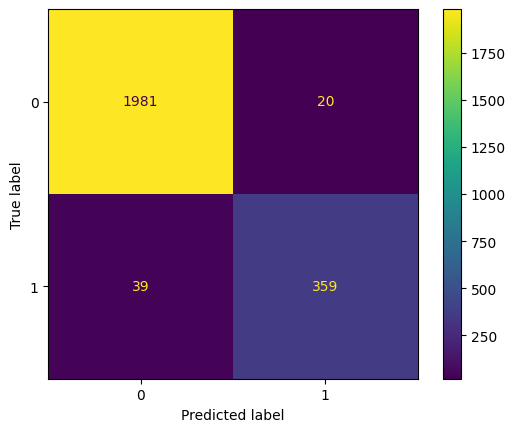

In [102]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format=''); #values_format set to suppress scientific notation

The model has almost twice the number of false negatives compared to false positives, at 39 against 20.
Comparing it with the first iteration's confusion matrix, the difference was just 10 false predictions: 49 against 59. Using the 2nd model was much more computationally light at this low accuracy cost.

Further, include the feature importances bar chart for both iterations of the RF Classifier model for exploration and deeper analysis opportunities.

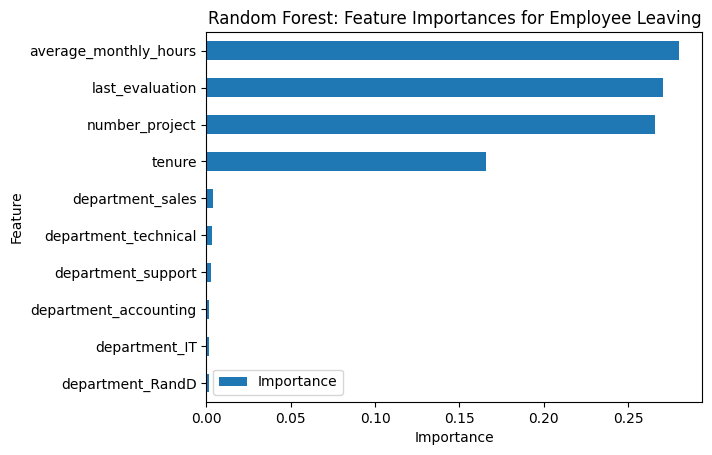

In [111]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
indices = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[indices]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[indices]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

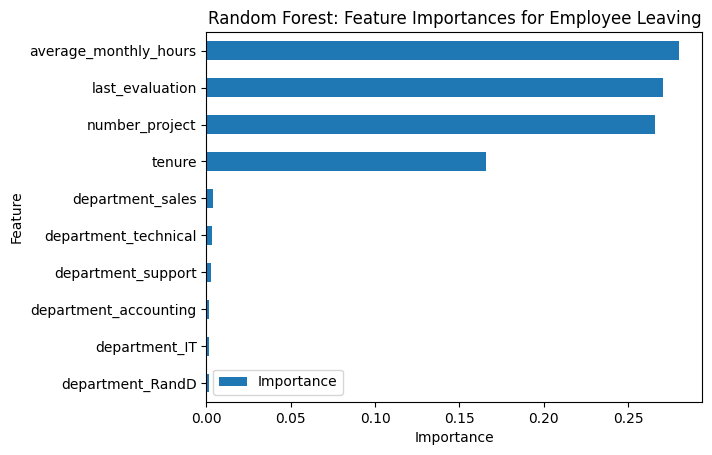

In [109]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
indices = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[indices]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[indices]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

In [ ]:
Columns `average_monthly_hours`, `last_evaluation`, `number_project`, and `tenure` are the most important features, in that order.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

 The model is fitted well to the data, and its second iteration is more appropriate, while both iterations have high accuracy rates, and a very small difference in AUC performance score, ranking random positive observations above random negative ones at above 97%.

 The stakeholders need to optimize the amount of work done by its employees, track the evaluation scores and how many projects each employee has. I presume closely paying attention to the needs and issues of those tenured for 5 and 6 years is essential if the company wants to preserve a pool of long-term employed professionals. Those who measured below average in both monthly hours and evaluation score need to be analyzed for underlying problems, and relevant training, work organization, and other methods need to be reviewed.
 
 As for the employees with higher project numbers and work hours, the company needs to prioritize employee work-life balance more than productivity outcomes, and possibly try to re-allocate the load on the projects using experiential learning for those with smaller tenures and small working hours along with the will to take on more responsibilities.

 Additionally, I would pay attention to the promotion principles of the workers with smaller work hours and evaluate whether, for instance, some of the employees might get overwhelmed by post-promotion pace of work and also account for personal circumstance in this context. This group's satisfaction levels were the highest among other employees who left the company, which leads to the question of whether this was because of a different company's better offer that left it higher or because of the unmet will to work longer hours.

## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret the model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
Random Forest's 2nd, lighter-computed model results are as follows:
* AUC of 97.17%
* Precision of 94.37%
* Recall of 90.2%
* Accuracy of 97.47%
* F1-score of 92.2%

### Conclusion, Recommendations, Next Steps

To retain employees, the following recommendations could be presented to the stakeholders:

* Commmunicate closer with the employees with longer working hours, offer schedule changes and re-scale rewards for workload.
* Re-allocate the number of projects employees work on, reconcile with the company needs in considering cutting the total number at the company.
* Research the low satisfaction level among those who worked for 4 years and left the company.
* Discuss and address work culture factors, pave the way for more flexible work organization, if present, fight workaholism in favor of the positive work environment with growth orientation, inter-colleague bonds, and just culture.
* Rigorously examine the evaluation process, focusing on the churn group at low working hours, low satisfaction and evaluation levels.

**Next steps**

 The `last_evaluation` metric renders more context information to consider pruning it as it might just be a proxy of long working hours and be done irregularly.